# **Training 3rd Project :** 
**Title :** Credit card approval Prediction
 
**Done By :** Sondos Hosny Deraz

---



## **1. Importing all the liberaries and packages needed.**

In [ ]:
# For data analysis :

import numpy as np
import pandas as pd

# For Data visualization : 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

#For Machine Learning :

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **2. Reading Data :**

In [ ]:
import os

#os.rename("cc_approvals.data","cc_approvals.csv")

In [ ]:
import pandas as pd

df = pd.read_csv("cc_approvals.csv" , delimiter = "," , header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
df.columns = ["Gender" , "Age", "Debt" , "Married", "BankCustomer" , "EducationLevel", "Ethnicity" , "YearsEmployed", "PriorDefault" , "Employed", "CreditScore" , "DriversLicense", "Citizen" , "ZipCode", "Income" , "Approved"]
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
df.shape

(690, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

## **3. Data Processing :**

In [ ]:
def ShowDetails():
    global df
    for col in df.columns : 
        print(f'for feature {col}\n')
        print(f'Number of Nulls is \n {df[col].isna().sum()}\n')
        print(f'Number of Unique Values is \n {len(df[col].unique())}\n')
        print(f'Unique Values is \n {df[col].unique()}\n')
        print(f'Value Counts are \n {df[col].value_counts()}\n')
        print('\n\n\n==================================\n\n\n')

In [ ]:
ShowDetails()

for feature Gender

Number of Nulls is 
 0

Number of Unique Values is 
 3

Unique Values is 
 ['b' 'a' '?']

Value Counts are 
 b    468
a    210
?     12
Name: Gender, dtype: int64







for feature Age

Number of Nulls is 
 0

Number of Unique Values is 
 350

Unique Values is 
 ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50

In [ ]:
df = df.replace("?", np.nan)

In [ ]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [ ]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


### **3.1 Handling Nulls :**

In [ ]:
df["Gender"].fillna("b", inplace = True)
df["Gender"].value_counts()

b    480
a    210
Name: Gender, dtype: int64

In [ ]:
age = df[["Age"]]
age

,Age
0,30.83
1,58.67
2,24.50
3,27.83
4,20.17
...,...
685,21.08
686,22.67
687,25.25
688,17.92


In [ ]:
age.isnull().sum()

Age    12
dtype: int64

In [ ]:
age = age.dropna()
age.isnull().sum()

Age    0
dtype: int64

In [ ]:
age['Age'] = age['Age'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
age.describe()

,Age
count,678.000000
mean,31.568171
std,11.957862
min,13.750000
25%,22.602500
50%,28.460000
75%,38.230000
max,80.250000


In [ ]:
df[["Age"]] = df[["Age"]].fillna(31.568171)

In [ ]:
print(df.isnull().sum())

Gender             0
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64


In [ ]:
df["Married"].fillna("u", inplace = True)
df["BankCustomer"].fillna("g", inplace = True)
df["EducationLevel"].fillna("c", inplace = True)
df["Ethnicity"].fillna("v", inplace = True)
df = df.drop(['ZipCode'],axis=1)
print(df.isnull().sum())
print(df.info())
df

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Income            0
Approved          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,-


In [ ]:
df['Married'] = df['Married'].replace('l', 'u')

In [ ]:
df['Age'] = df['Age'].astype(float)

## **4. Data Visualizing** :

In [ ]:
df['Approved'] = df['Approved'].replace('-', 0) \
    .replace('+', 1) 

In [ ]:
def AgeRange(H) : 
    if H < 17 : 
        return 'Child'
    elif 17<=H < 31 : 
        return 'Adult'
    elif 31<=H < 45 : 
        return 'Middle Aged Adult'
    else : 
        return 'Old Aged Adult'

df['AgeRange']   = df['Age'].apply(lambda x : AgeRange(x))
df[['Age','AgeRange']]

,Age,AgeRange
0,30.83,Adult
1,58.67,Old Aged Adult
2,24.50,Adult
3,27.83,Adult
4,20.17,Adult
...,...,...
685,21.08,Adult
686,22.67,Adult
687,25.25,Adult
688,17.92,Adult


In [ ]:
df['AgeRange'].value_counts()

Adult                367
Middle Aged Adult    209
Old Aged Adult        94
Child                 20
Name: AgeRange, dtype: int64

In [ ]:
def Pie(feature,limit=20) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


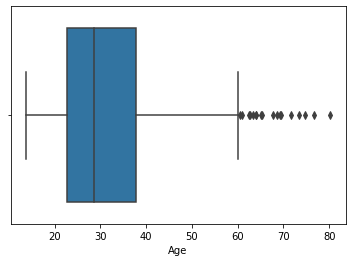

In [ ]:
sns.boxplot(df['Age'] )

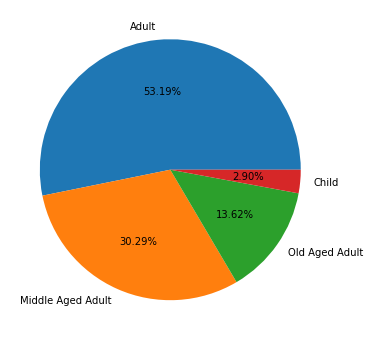

In [ ]:
Pie('AgeRange',4)

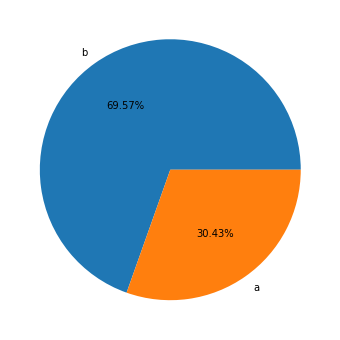

In [ ]:
Pie('Gender',2)

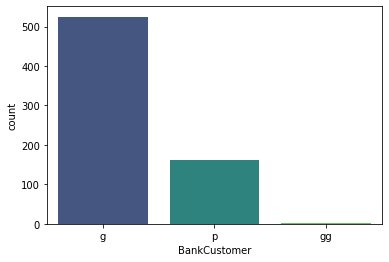

In [ ]:
sns.countplot(x='BankCustomer', data=df ,palette='viridis')

In [ ]:
def YearsEmployedRange(H) : 
    if H < 2 : 
        return 'Fresh'
    elif 2<=H < 5 : 
        return 'Junior'
    else : 
        return 'Senior'

df['YearsEmployedRange']   = df['YearsEmployed'].apply(lambda x : YearsEmployedRange(x))
df[['YearsEmployed','YearsEmployedRange']]

,YearsEmployed,YearsEmployedRange
0,1.25,Fresh
1,3.04,Junior
2,1.50,Fresh
3,3.75,Junior
4,1.71,Fresh
...,...,...
685,1.25,Fresh
686,2.00,Junior
687,2.00,Junior
688,0.04,Fresh


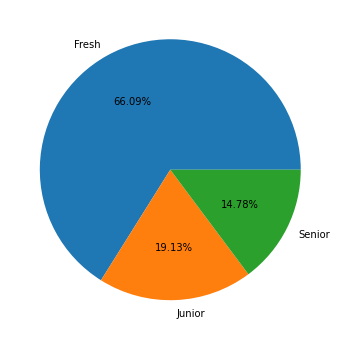

In [ ]:
Pie('YearsEmployedRange',3)

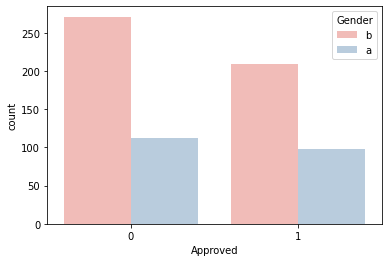

In [ ]:
sns.countplot(x='Approved', data=df, hue='Gender', palette='Pastel1')

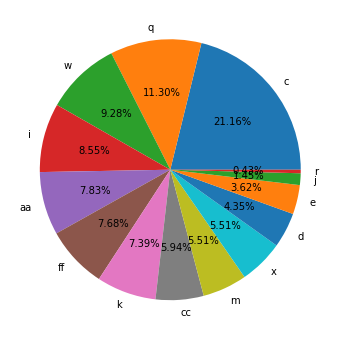

In [ ]:
Pie('EducationLevel',14)

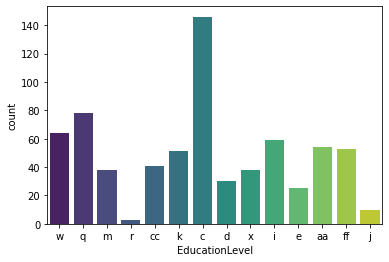

In [ ]:
sns.countplot(x='EducationLevel', data=df ,palette='viridis')

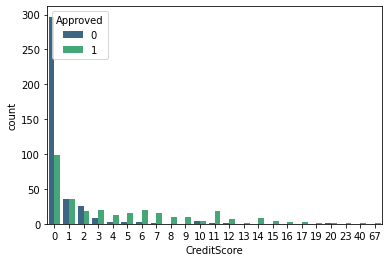

In [ ]:
sns.countplot(x='CreditScore', data=df, hue='Approved', palette='viridis')

In [ ]:
def DebtRange(H) : 
    if H < 10 : 
        return 'Low'
    elif 10<=H < 20 : 
        return 'Middle'
    else : 
        return 'High'

df['DebtRange']   = df['Debt'].apply(lambda x : DebtRange(x))
df[['Debt','DebtRange']]

,Debt,DebtRange
0,0.000,Low
1,4.460,Low
2,0.500,Low
3,1.540,Low
4,5.625,Low
...,...,...
685,10.085,Middle
686,0.750,Low
687,13.500,Middle
688,0.205,Low


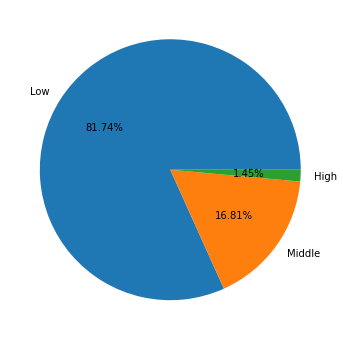

In [ ]:
Pie('DebtRange',14)

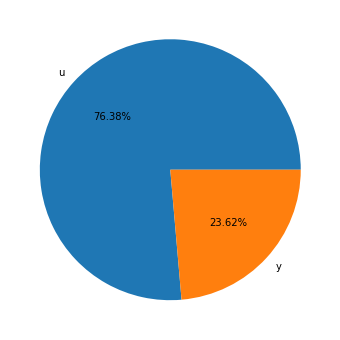

In [ ]:
Pie('Married',3)

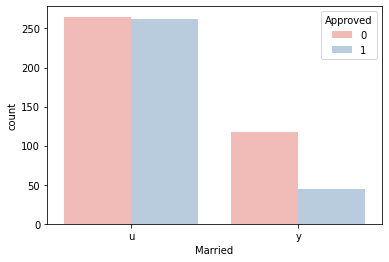

In [ ]:
sns.countplot(x='Married', data=df, hue='Approved', palette='Pastel1')

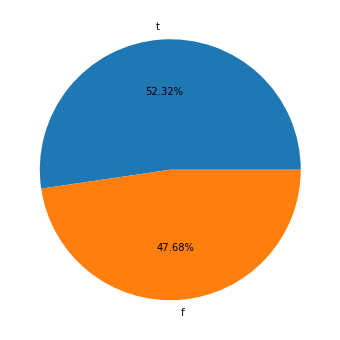

In [ ]:
Pie('PriorDefault',2)

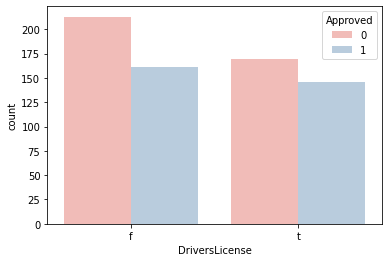

In [ ]:
sns.countplot(x='DriversLicense', data=df, hue='Approved', palette='Pastel1')

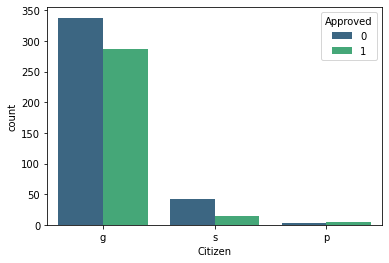

In [ ]:
sns.countplot(x='Citizen', data=df, hue='Approved', palette='viridis')

In [ ]:
def IncomeRange(H) : 
    if H < 500 : 
        return 'Very Low'
    elif 500<=H < 800 : 
        return 'Low'
    elif 800<=H < 1000 : 
        return 'Middle'
    elif 1000<=H < 5000 : 
        return 'High'
    else : 
        return 'Very High'

df['IncomeRange']   = df['Income'].apply(lambda x : IncomeRange(x))
df[['Income','IncomeRange']]

,Income,IncomeRange
0,0,Very Low
1,560,Low
2,824,Middle
3,3,Very Low
4,0,Very Low
...,...,...
685,0,Very Low
686,394,Very Low
687,1,Very Low
688,750,Low


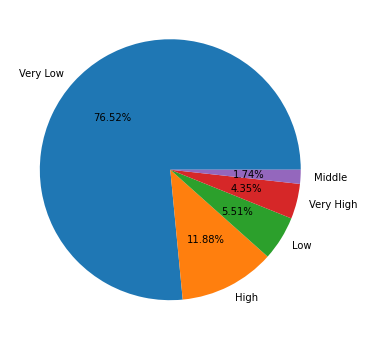

In [ ]:
Pie('IncomeRange',5)

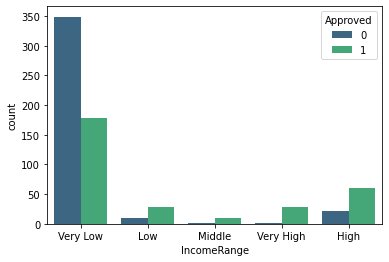

In [ ]:
sns.countplot(x='IncomeRange', data=df, hue='Approved', palette='viridis')

In [ ]:
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved,AgeRange,YearsEmployedRange,DebtRange,IncomeRange
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,1,Adult,Fresh,Low,Very Low
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,1,Old Aged Adult,Junior,Low,Low
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,1,Adult,Fresh,Low,Middle
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,1,Adult,Junior,Low,Very Low
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,1,Adult,Fresh,Low,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,0,Adult,Fresh,Middle,Very Low
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,0,Adult,Junior,Low,Very Low
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,0,Adult,Junior,Middle,Very Low
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,0,Adult,Fresh,Low,Low


## **5. Data preprocessing and machine Learning**

### **5.1 Data Preprocessing :**

In [ ]:
dfdummies = pd.get_dummies(data=df,columns=['Gender','Married' , 'BankCustomer' , 'EducationLevel' , 'Ethnicity' , 'PriorDefault' , 'Employed' , 'DriversLicense' ,'Citizen' , 'AgeRange' , 'YearsEmployedRange' , 'DebtRange' , 'IncomeRange' ])

In [ ]:
dfdummies

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,Gender_a,Gender_b,Married_u,Married_y,...,YearsEmployedRange_Junior,YearsEmployedRange_Senior,DebtRange_High,DebtRange_Low,DebtRange_Middle,IncomeRange_High,IncomeRange_Low,IncomeRange_Middle,IncomeRange_Very High,IncomeRange_Very Low
0,30.83,0.000,1.25,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
1,58.67,4.460,3.04,6,560,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,24.50,0.500,1.50,0,824,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,27.83,1.540,3.75,5,3,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,20.17,5.625,1.71,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
686,22.67,0.750,2.00,2,394,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
687,25.25,13.500,2.00,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
688,17.92,0.205,0.04,0,750,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
dfdummies.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved',
       'Gender_a', 'Gender_b', 'Married_u', 'Married_y', 'BankCustomer_g',
       'BankCustomer_gg', 'BankCustomer_p', 'EducationLevel_aa',
       'EducationLevel_c', 'EducationLevel_cc', 'EducationLevel_d',
       'EducationLevel_e', 'EducationLevel_ff', 'EducationLevel_i',
       'EducationLevel_j', 'EducationLevel_k', 'EducationLevel_m',
       'EducationLevel_q', 'EducationLevel_r', 'EducationLevel_w',
       'EducationLevel_x', 'Ethnicity_bb', 'Ethnicity_dd', 'Ethnicity_ff',
       'Ethnicity_h', 'Ethnicity_j', 'Ethnicity_n', 'Ethnicity_o',
       'Ethnicity_v', 'Ethnicity_z', 'PriorDefault_f', 'PriorDefault_t',
       'Employed_f', 'Employed_t', 'DriversLicense_f', 'DriversLicense_t',
       'Citizen_g', 'Citizen_p', 'Citizen_s', 'AgeRange_Adult',
       'AgeRange_Child', 'AgeRange_Middle Aged Adult',
       'AgeRange_Old Aged Adult', 'YearsEmployedRange_Fresh',
       'YearsEmployedRange_Junior', 'YearsE

In [ ]:
# Selecting Feature

x = dfdummies.drop(['Age' , 'Debt' , 'YearsEmployed' , 'Income' , 'Approved'],axis=1)
y = dfdummies['Approved']

### **5.2 Machine Learning :**

In [ ]:
# Splitting Data 

x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#fit your model on the train set.

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#perform prediction on the test set.

y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

Model Evaluation using Confusion Matrix :

In [ ]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[66, 12],
       [12, 48]])

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8260869565217391


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        78
           1       0.80      0.80      0.80        60

    accuracy                           0.83       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.83      0.83      0.83       138



In [ ]:
'''le=LabelEncoder()

for col in df.columns:
  if df[col].dtypes=='object':
    df[col]=le.fit_transform(df[col])
df.info()'''

"le=LabelEncoder()\n\nfor col in df.columns:\n  if df[col].dtypes=='object':\n    df[col]=le.fit_transform(df[col])\ndf.info()"